In [1]:
import sys, time, wmi, psutil
SYSTEM_INFO = wmi.WMI().Win32_OperatingSystem()[0]
"system: {0}, {1}, {2}".format(SYSTEM_INFO.Caption, SYSTEM_INFO.BuildNumber, SYSTEM_INFO.OSArchitecture) 
"memory: {}G".format(round(psutil.virtual_memory().total / 1024**3, 2))
"cpu: {}".format(psutil.cpu_count())
"python: {}".format(sys.version)
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))

'system: Microsoft Windows 10 企业版, 17134, 64 位'

'memory: 15.86G'

'cpu: 4'

'python: 3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]'

'2019-08-02 15:40:17'

- **@author**: run_walker
- **@references**:
    1. [使用Matplotlib和Imagemagick实现算法可视化与GIF导出](http://www.hankcs.com/ml/using-matplotlib-and-imagemagick-to-realize-the-algorithm-visualization-and-gif-export.html)
    2. [Matplotlib借助ImageMagick或ffmpeg生成动图（.gif）或视频可能遇到的问题和解决方案](https://blog.csdn.net/icurious/article/details/81709797)
    3. [matplotlib使用ImageMagick制作gif图像](https://www.jianshu.com/p/d64b8f39b4da)

# 生成动画

In [2]:
import matplotlib.animation as animation

In [5]:
help(animation.FuncAnimation)

Help on class FuncAnimation in module matplotlib.animation:

class FuncAnimation(TimedAnimation)
 |  Makes an animation by repeatedly calling a function *func*.
 |  
 |  Parameters
 |  ----------
 |  fig : matplotlib.figure.Figure
 |     The figure object that is used to get draw, resize, and any
 |     other needed events.
 |  
 |  func : callable
 |     The function to call at each frame.  The first argument will
 |     be the next value in *frames*.   Any additional positional
 |     arguments can be supplied via the *fargs* parameter.
 |  
 |     The required signature is::
 |  
 |        def func(frame, *fargs) -> iterable_of_artists
 |  
 |     If ``blit == True``, *func* must return an iterable of all artists
 |     that were modified or created. This information is used by the blitting
 |     algorithm to determine which parts of the figure have to be updated.
 |     The return value is unused if ``blit == False`` and may be omitted in
 |     that case.
 |  
 |  frames : iterab

[官网参数详解](https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation)

- `fig`: 进行动画绘制的`Figure`对象
- `func`: 自定义的更新每帧的函数，其中参数`frame`传入的是`frames`中下一个值
```python
def func(frame, *fargs) -> iterable_of_artists
```
- `frames`: 可以传入可迭代对象，整数，生成器或者`None`
    * ***iterable***: simply use the values provided
    * ***int***:  equivalent to passing `range(frames)`
    * ***generator function***: 
        ```python
        def gen_function() -> obj
        ```
    * ***None***: equivalent to passing `itertools.count`
- `init_func`: 用来画初始帧的函数，这个函数只会在第一帧之前被调用一次。如果没有传入该参数，那么会用帧序列中的第一帧来替代。 
- `fargs`: Additional arguments to pass to each call to `func`
- `save_count`:
- `interval`: 帧间距(单位ms)，默认200毫秒
- `repeat`: 是否循环播放，默认为`True`
- `repeat_delay`: 动画循环间距，单位为ms，默认为`None`
- `blit`: 选择更新所有点，还是仅更新产生变化的点。默认为`True`（未验证：但mac用户请选择`False`，否则无法显示动画）
- `cache_frame_data`:

# 配置`writer`
常用的有`ffmpeg`和`imagemagick`，前者用于生成`.mp4`文件，后者用于生成`.gif`文件。可以单独安装`ffmpeg`，也可以在安装`imagemagick`时通过勾选附带安装。

In [30]:
import matplotlib.animation as animation
animation.writers.list()

['pillow', 'ffmpeg', 'ffmpeg_file', 'imagemagick', 'imagemagick_file', 'html']

In [31]:
!ffmpeg -version

ffmpeg version 3.4 Copyright (c) 2000-2017 the FFmpeg developers
built with gcc 7.2.0 (GCC)
configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-bzlib --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-cuda --enable-cuvid --enable-d3d11va --enable-nvenc --enable-dxva2 --enable-avisynth --enable-libmfx
libavutil      55. 78.100 / 55. 78.100
libavcodec     57.107.100 / 57.107.100
libavformat    57. 83.100 / 57. 83.100
libavdevice    57. 10.100 / 57. 10.100
libavfilter     6.107.100 /  6.107.100
libswscale      4.  8.100 /  4.  8.100
libswresample   2.  9.100 /  2

In [32]:
!convert -version

Version: ImageMagick 7.0.8-58 Q16 x64 2019-07-30 http://www.imagemagick.org
Copyright: Copyright (C) 1999-2018 ImageMagick Studio LLC
License: http://www.imagemagick.org/script/license.php
Visual C++: 180040629
Features: Cipher DPC Modules OpenCL OpenMP(2.0) 
Delegates (built-in): bzlib cairo flif freetype gslib heic jng jp2 jpeg lcms lqr lzma openexr pangocairo png ps raw rsvg tiff webp xml zlib


In [33]:
!magick -version

Version: ImageMagick 7.0.8-58 Q16 x64 2019-07-30 http://www.imagemagick.org
Copyright: Copyright (C) 1999-2018 ImageMagick Studio LLC
License: http://www.imagemagick.org/script/license.php
Visual C++: 180040629
Features: Cipher DPC Modules OpenCL OpenMP(2.0) 
Delegates (built-in): bzlib cairo flif freetype gslib heic jng jp2 jpeg lcms lqr lzma openexr pangocairo png ps raw rsvg tiff webp xml zlib


通常需要将其加入环境变量中，但也可以通过修改`matplotlib`的配置文件来达成。
1. 法一：修改`matplotlibrc`文件
2. 法二：修改`matplotlib\__init__.py`文件

详见 [使用Matplotlib和Imagemagick实现算法可视化与GIF导出](http://www.hankcs.com/ml/using-matplotlib-and-imagemagick-to-realize-the-algorithm-visualization-and-gif-export.html)

In [3]:
import matplotlib
matplotlib.matplotlib_fname()  # 配置文件位置

'D:\\anaconda3\\envs\\python36\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

# demos

## 官网例子
`frames`传入`iterable`

<IPython.core.display.Javascript object>


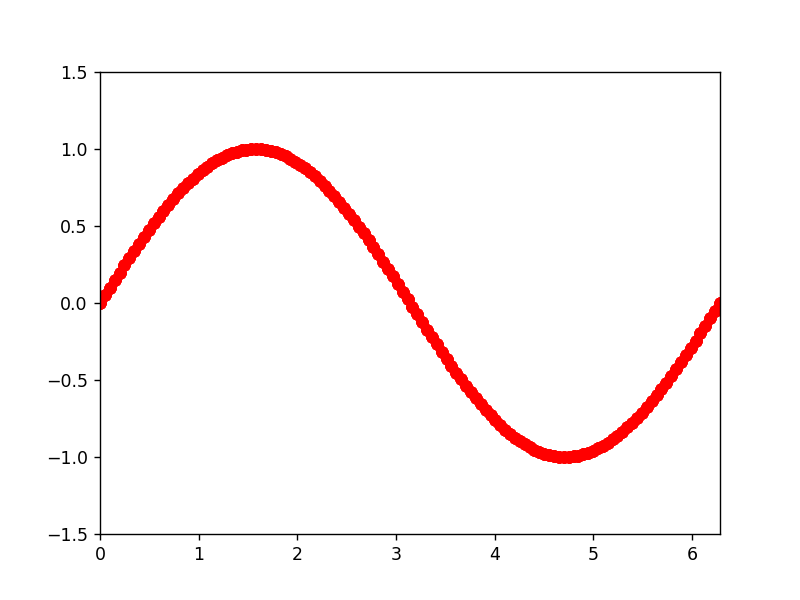

In [41]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')


def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1.5, 1.5)
    return ln,


def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128), init_func=init, blit=True, interval=20)
plt.show()

## mechanical wave
`frames`传入`int`

<IPython.core.display.Javascript object>


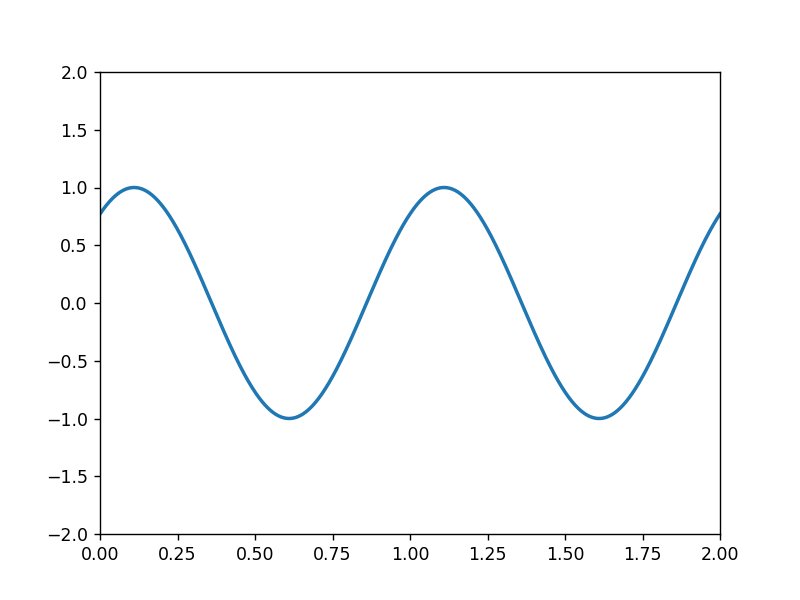

In [108]:
%matplotlib notebook 

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
 
# first set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)


def init():
    # initialization function: plot the background of each frame
    line.set_data([], [])
    return line,


def animate(i):
    # animation function.  this is called sequentially
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=true means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
plt.show()

In [37]:
anim.save('mechanical wave.gif', writer='imagemagick')

In [39]:
anim.save('mechanical wave.mp4')  # writer默认为ffmpeg

## [Decay](https://matplotlib.org/gallery/animation/animate_decay.html)
`frames`传入`generator function`

<IPython.core.display.Javascript object>


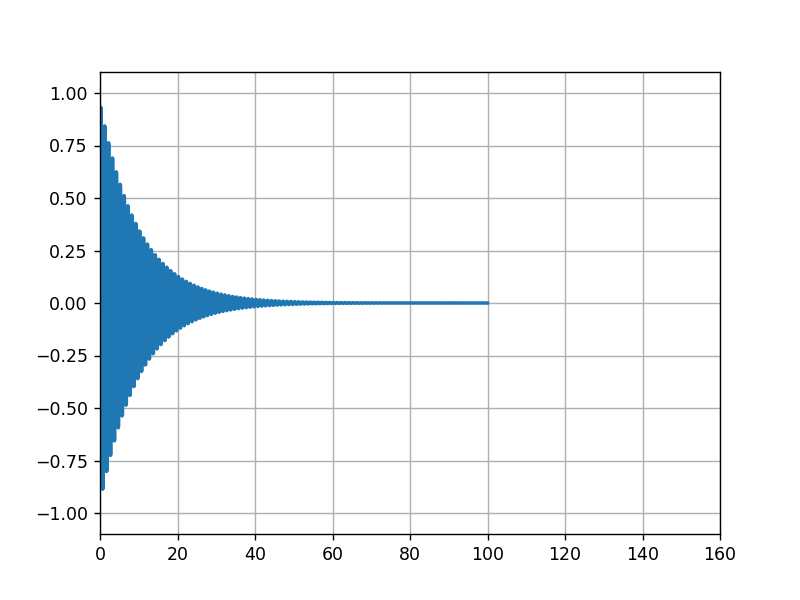

In [3]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,


def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, init_func=init, blit=False, interval=10, repeat=False)
plt.show() 

## perceptron

In [109]:
training_set = [[(3, 3), 1], [(4, 3), 1], [(1, 1), -1]]
history = [
    [[3, 3], 1],
    [[2, 2], 0],
    [[1, 1], -1],
    [[0, 0], -2],
    [[3, 3], -1],
    [[2, 2], -2],
    [[1, 1], -3]
]


class Perceptron:
    def __init__(self, training_set, history):
        self.training_set = training_set
        self.history = history
        #
        self.fig, self.ax = plt.subplots()
        self.line, = self.ax.plot([], [], 'g', lw=2)
        self.label = self.ax.text([], [], '')

    def init(self):
        """
        initialization function: plot the background of each frame
        :return:
        """
        self.line.set_data([], [])
        x, y, x_, y_ = [], [], [], []
        for p in self.training_set:
            if p[1] > 0:
                x.append(p[0][0])
                y.append(p[0][1])
            else:
                x_.append(p[0][0])
                y_.append(p[0][1])

        self.ax.plot(x, y, 'bo', x_, y_, 'rx')
        plt.axis([-6, 6, -6, 6])
        plt.grid(True)
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.ax.set_title('Perceptron')

        return self.line, self.label

    def animate(self, i):
        """
        animation function.  this is called sequentially
        :param i:
        :return:
        """
        w, b = self.history[i]
        if w[1] == 0:
            return self.line, self.label
        x1 = -7
        y1 = -(b + w[0] * x1) / w[1]
        x2 = 7
        y2 = -(b + w[0] * x2) / w[1]
        self.line.set_data([x1, x2], [y1, y2])
        x1 = 0
        y1 = -(b + w[0] * x1) / w[1]
        self.label.set_text(history[i])
        self.label.set_position([x1, y1])
        return self.line, self.label
    
    def display(self):
        global anim
        anim = animation.FuncAnimation(self.fig, self.animate, init_func=self.init, frames=len(self.history), 
                                       interval=1000, repeat=True, blit=True)
        plt.show()

<IPython.core.display.Javascript object>


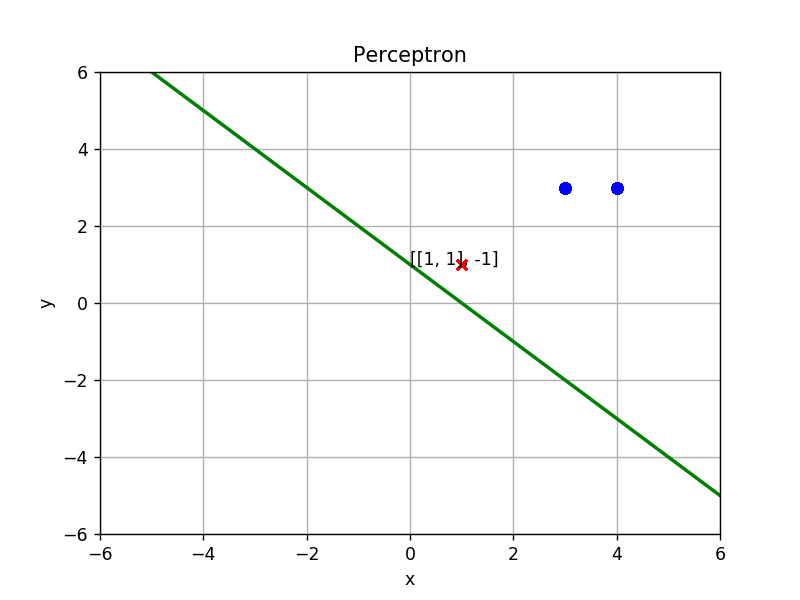

In [110]:
p = Perceptron(training_set, history)
p.display()